In [1]:
# Import Libraries
import numpy as np  # to handle matrix
import pandas as pd # to handle data
from matplotlib import pyplot as plt # to visualize
import datetime, pytz # to handle time
import datetime as dt
from sklearn.model_selection import train_test_split # Split data
from sklearn.ensemble import RandomForestRegressor # Random Forest Classifier
import seaborn as sns

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from datetime import datetime
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3379 entries, 2011-12-31 to 2021-03-31
Freq: D
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               3376 non-null   float64
 1   High               3376 non-null   float64
 2   Low                3376 non-null   float64
 3   Close              3376 non-null   float64
 4   Volume_(BTC)       3376 non-null   float64
 5   Volume_(Currency)  3376 non-null   float64
 6   Weighted_Price     3376 non-null   float64
dtypes: float64(7)
memory usage: 211.2 KB


In [5]:
daily_df = df

In [6]:
# Volume is single event so fill "NaN"s with zeroes for relevant fields
daily_df['Volume_(BTC)'].fillna(value=0, inplace=True)
daily_df['Volume_(Currency)'].fillna(value=0, inplace=True)
daily_df['Weighted_Price'].fillna(value=0, inplace=True)


# (open, high, low, close) data which is a continuous timeseries so 'fill forwards' those values
daily_df['Open'].fillna(method='ffill', inplace=True)
daily_df['High'].fillna(method='ffill', inplace=True)
daily_df['Low'].fillna(method='ffill', inplace=True)
daily_df['Close'].fillna(method='ffill', inplace=True)

print("Shape: ", daily_df.shape)
print("Columns= ", daily_df.columns)
print("Is There any 'NaN' value: ", daily_df.isnull().values.any())
print("Is there any duplicate value: ", daily_df.index.duplicated().any())

Shape:  (3379, 7)
Columns=  Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')
Is There any 'NaN' value:  False
Is there any duplicate value:  False


# Visualization

In [7]:
daily_df.rename(columns={'Volume_(BTC)': 'Volume_BTC', 'Volume_(Currency)': 'Volume_Currency'}, inplace=True)

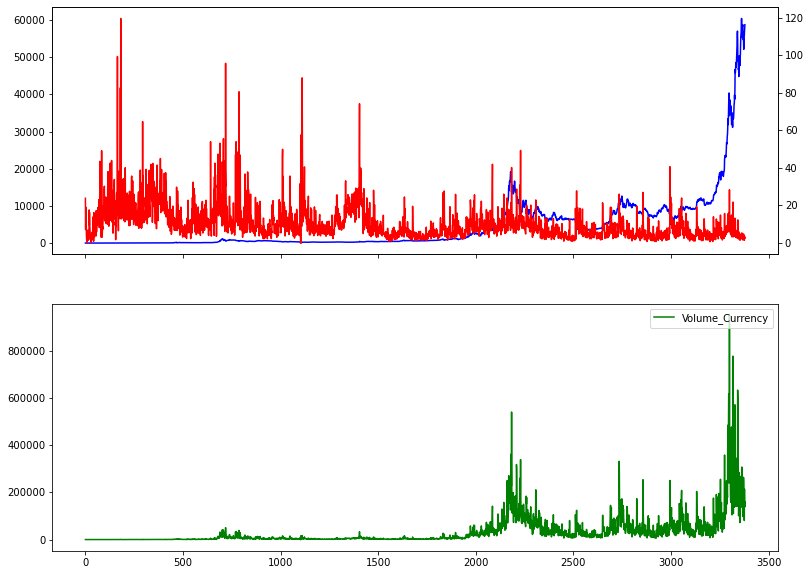

In [15]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(211)
ax2 = ax.twinx()
ax3 = fig.add_subplot(212, sharex=ax)

daily_df.Weighted_Price.plot(ax=ax, label="Weighted_Price", style='b-')
daily_df.Volume_BTC.plot(ax=ax2, label="Volume_BTC", style='r-')
daily_df.Volume_Currency.plot(ax=ax3, label="Volume_Currency", style='g-')
plt.legend(loc='upper right')
plt.show()

In [9]:
# Feature Correlation
# A good way to take a general look at the data is to visualize the correlations between the features. 
# We can do this using a heatmap of the correlation matrix of our data. 
# We will calculate our data correlation matrix using the Pearson Correlation Cofficient 
# This Value ranges between +1 and -1.
# With +1 being total direct correlation, 
# -1 represeting total inverse correlation and 
# 0 meaning no correlation at all.

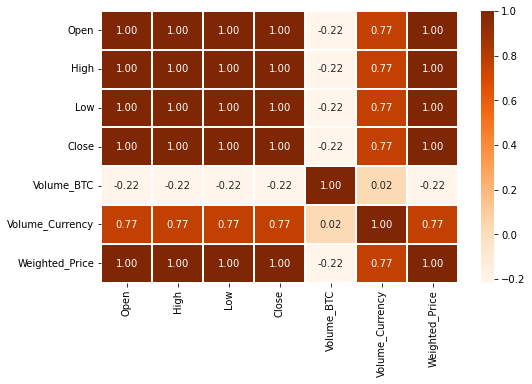

In [10]:
sns.heatmap(daily_df.corr(method='pearson'), annot=True, cmap='Oranges', linewidths=0.2, yticklabels=True, fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

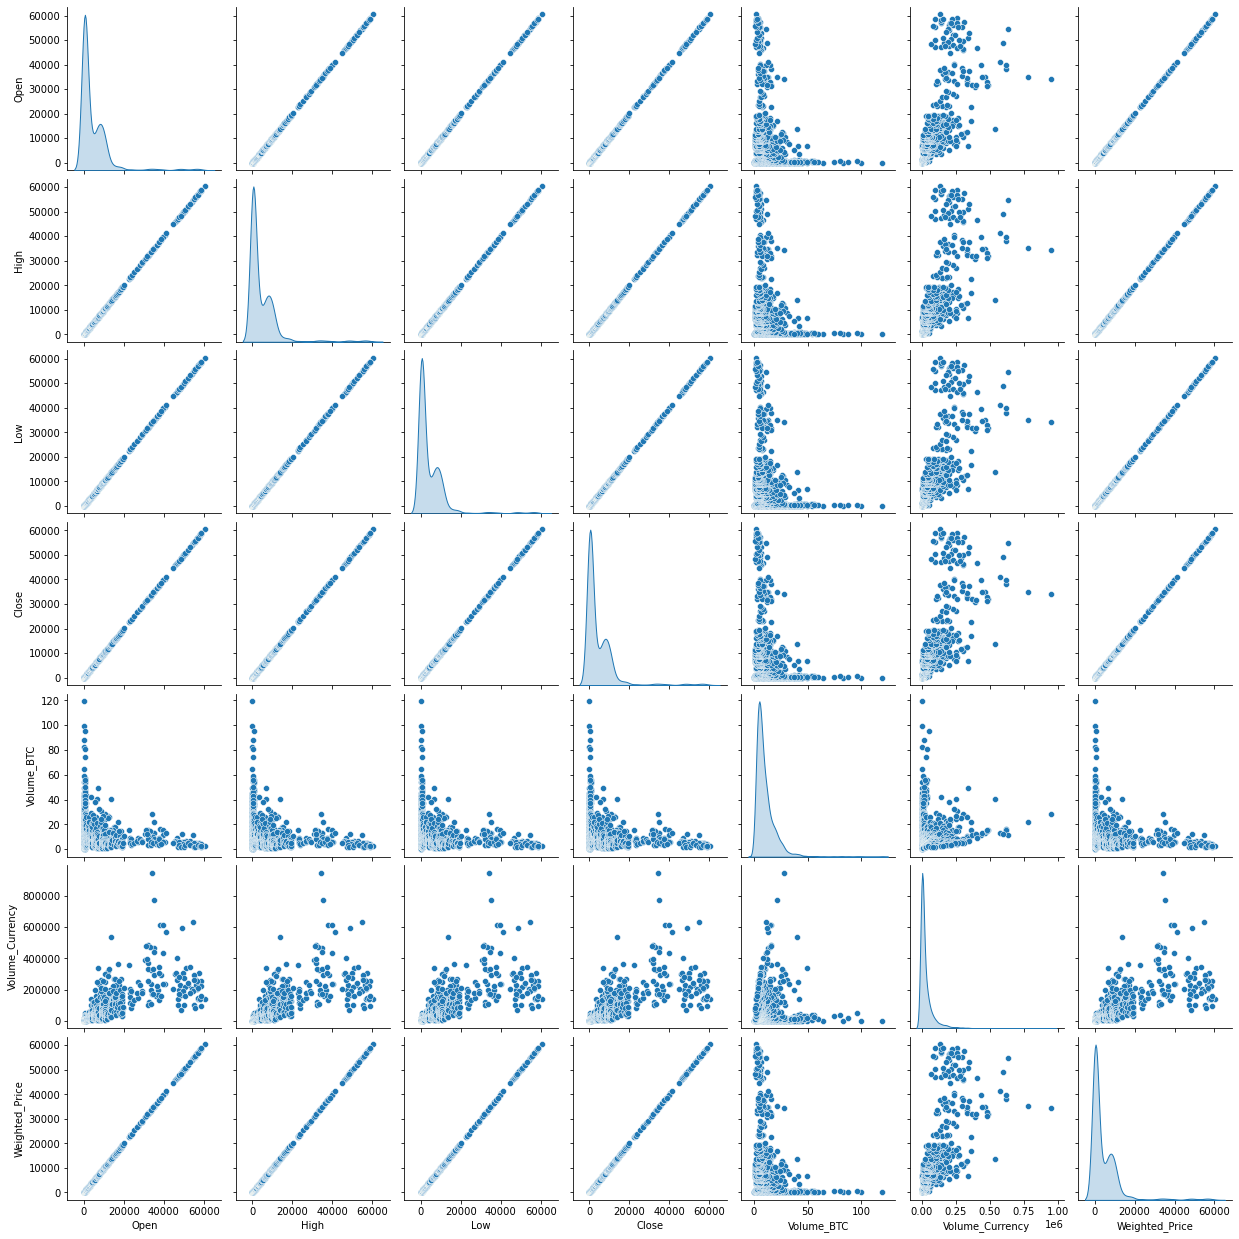

In [11]:
sns.pairplot(daily_df, diag_kind="kde")

In [12]:
daily_df.reset_index(inplace=True)
daily_df.rename(columns={'Timestamp': 'Date', }, inplace=True)
daily_df["Date"]=pd.to_datetime(daily_df["Date"])
daily_df['Year'] = daily_df["Date"].dt.year

In [17]:
sns.relplot(data=daily_df, x='Volume_BTC', y='Weighted_Price','year')



SyntaxError: positional argument follows keyword argument (1720574108.py, line 1)

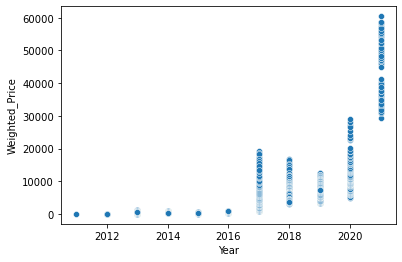

In [14]:
ax = sns.scatterplot(x="Year", y="Weighted_Price", data=daily_df)